In [36]:
import pandas as pd
import numpy as np

data_2022 = pd.read_csv("2022stats.csv")

##First we will drop the columns that we do not need.
copy_2022 = data_2022.copy()
copy_2022.sort_values("Player")
copy_2022.drop(labels = ['G', 'Team', 'R', '2B', '3B', 'RBI', 'SB', 'CS', 'SH', 'SF', 'HBP'],axis='columns', inplace=True) 

#Now I will delete people that have lower than 100 At Bats(AB)
above_100_2022 = copy_2022['AB'] >= 100

copy_2022 = copy_2022[above_100_2022]


#Now we will combine the names that have multiple instances
copy_2022 = copy_2022.groupby('Player').agg({'AB' : 'sum', 'H' : 'sum','SO' : 'sum',  'BB' : 'sum', 'HR' : 'sum', 'AVG' : 'mean', 'OBP' : 'mean', 'SLG' : 'mean', 'OPS' : 'mean'})
def avg_group(x):
    return int(x * 1000)

copy_2022['AVG_group'] = copy_2022['AVG'].apply(avg_group)

print(copy_2022)

from sklearn.model_selection import train_test_split

train_2022, test_2022 = train_test_split(copy_2022, test_size=0.2, random_state=42)

                 AB    H   SO   BB  HR    AVG    OBP    SLG    OPS  AVG_group
Player                                                                       
AJ Pollock      489  120   98   32  14  0.245  0.292  0.389  0.681        245
Aaron Hicks     384   83  109   62   8  0.216  0.330  0.313  0.643        216
Aaron Judge     570  177  175  111  62  0.311  0.425  0.686  1.111        311
Abraham Toro    324   60   65   22  10  0.185  0.239  0.324  0.563        185
Adam Duvall     287   61  101   21  12  0.213  0.276  0.401  0.677        213
...             ...  ...  ...  ...  ..    ...    ...    ...    ...        ...
Yonathan Daza   372  112   58   26   2  0.301  0.349  0.384  0.733        301
Yordan Alvarez  470  144  106   78  37  0.306  0.406  0.613  1.019        306
Yoshi Tsutsugo  170   29   50   19   2  0.171  0.249  0.229  0.478        171
Yuli Gurriel    545  132   73   30   8  0.242  0.288  0.360  0.648        242
Zach McKinstry  155   32   48   13   4  0.206  0.272  0.361  0.6

## X and Y
There are multiple correlation I would like to test in the data. I would like to test the Hits to the Average. I would like to test the SO to the average and the OBP to the average.

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


X = train_2022[['H']]
Y = train_2022['AVG']
reg.fit(X,Y)

print("The bias in H is ", reg.intercept_)
print("The feature coefficients in H are ", reg.coef_)

X = train_2022[['SO']]
Y = train_2022['AVG']
reg.fit(X,Y)

print("The bias in SO is ", reg.intercept_)
print("The feature coefficients in SO are ", reg.coef_)

X = train_2022[['OBP']]
Y = train_2022['AVG']
reg.fit(X,Y)
print("The bias in OBP is ", reg.intercept_)
print("The feature coefficients in OBP are ", reg.coef_)

The bias in H is  0.2004787473699906
The feature coefficients in H are  [0.00047705]
The bias in SO is  0.2280417370303252
The feature coefficients in SO are  [0.00014877]
The bias in OBP is  0.009168865732200382
The feature coefficients in OBP are  [0.75120373]


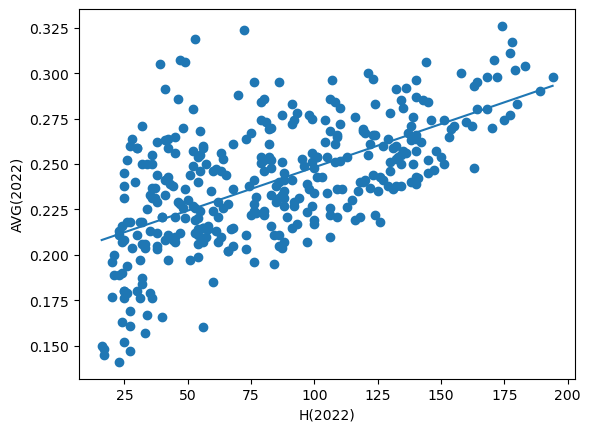

0.36473443577585896


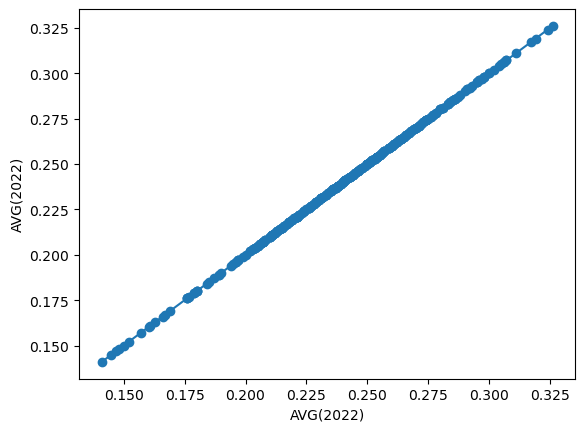

1.0


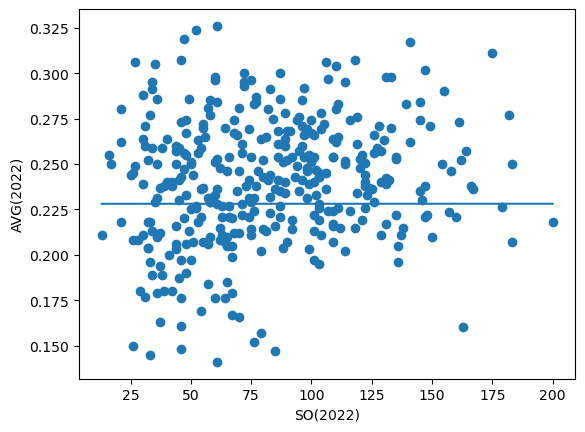

0.02667555476331651
Score for Strikouts vs Average 0.02667555476331651
Score for Hits VS AVG 0.36473443577585896
The score for Average and Average 1.0


In [44]:
def the_line(h, bias, coef):
    return bias + coef * h

X = train_2022[['H']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

min_H = train_2022["H"].min()
min_AVG = the_line(min_H, theta0, theta1)
max_H = train_2022["H"].max()
max_AVG = the_line(max_H, theta0, theta1)
line_x = [min_H, max_H]
line_y = [min_AVG, max_AVG]

import matplotlib.pyplot as plt
plt.scatter(train_2022["H"], train_2022["AVG"])
plt.xlabel("H(2022)")
plt.ylabel("AVG(2022)")
plt.plot(line_x, line_y)
plt.show()

print(reg.score(X,Y))


X = train_2022[['AVG']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

min_H = train_2022["AVG"].min()
min_AVG = the_line(min_H, theta0, theta1)
max_H = train_2022["AVG"].max()
max_AVG = the_line(max_H, theta0, theta1)
line_x = [min_H, max_H]
line_y = [min_AVG, max_AVG]

import matplotlib.pyplot as plt
plt.scatter(train_2022["AVG"], train_2022["AVG"])
plt.xlabel("AVG(2022)")
plt.ylabel("AVG(2022)")
plt.plot(line_x, line_y)
plt.show()

print(reg.score(X,Y))

X = train_2022[['SO']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

min_SO = train_2022["SO"].min()
min_AVG = the_line(min_H, theta0, theta1)
max_SO = train_2022["SO"].max()
max_AVG = the_line(max_H, theta0, theta1)
line_x = [min_SO, max_SO]
line_y = [min_AVG, max_AVG]

import matplotlib.pyplot as plt
plt.scatter(train_2022["SO"], train_2022["AVG"])
plt.xlabel("SO(2022)")
plt.ylabel("AVG(2022)")
plt.plot(line_x, line_y)
plt.show()

print(reg.score(X,Y))

X = train_2022[['SO']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("Score for Strikouts vs Average", reg.score(X,Y))

X = train_2022[['H']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("Score for Hits VS AVG", reg.score(X,Y))

X = train_2022[['AVG']]
Y = train_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("The score for Average and Average", reg.score(X,Y))
                                        

## Comment on Results
Now looking at just those three different features you can see that hits has somewhat of a correlation and strikeouts has almost no correlation. It may not seem to make sense to test the average vs the average but I am hoping that this one will be perfect in my predictions.

In [45]:
X = test_2022[['H']]
Y = test_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("Score for Hits vs Average", reg.score(X,Y))

X = test_2022[['SO']]
Y = test_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("Score for Strikeouts vs Average", reg.score(X,Y))

X = test_2022[['AVG']]
Y = test_2022['AVG']
reg.fit(X,Y)

theta0 = reg.intercept_
theta1 = reg.coef_[0]

print("The score for Average vs Average", reg.score(X,Y))

Score for Hits vs Average 0.47577814580480593
Score for Strikeouts vs Average 0.008285478135999336
The score for Average vs Average 1.0


## Results
The correlations that I am trying to find are only partially there. The strongest correlation was between average and itself for obvious reasons. I think this will be the best in my decision tree classifier. I will test all the differents features and try to find the ones that do the best.